# Wstęp do uczenia maszynowego - praca domowa nr 3

#### Jędrzej Sokołowski, Filip Szympliński
#### 8 kwietnia 2022

### Wczytanie pakietów oraz danych

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
import copy
warnings.filterwarnings('ignore')

# ustawia domyślną wielkość wykresów
plt.rcParams['figure.figsize'] = (12,12)
# to samo tylko dla tekstu
plt.rcParams['font.size'] = 16
# ustawia wielkość tekstów dla wykresów seaborn zależną od wielkości wykresu
sns.set_context('paper', font_scale=1.4)

In [102]:
data = pd.read_csv("data.csv", sep=",")

In [103]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [104]:
from sklearn.model_selection import train_test_split

X = data.drop("Bankrupt?", axis=1)
y = data["Bankrupt?"]
y = y.astype('int')

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=420, test_size=0.2)

In [105]:
data_train_val = pd.concat([X_train_val, y_train_val], axis = 1)
data_test = pd.concat([X_test, y_test], axis=1)

In [106]:
data_train_val

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
5704,0.557451,0.623583,0.608116,0.600182,0.600182,0.998986,0.797671,0.809552,0.303980,0.781828,...,0.064615,0.623881,0.600178,0.843383,0.276928,0.026792,0.565160,1,0.053312,0
3605,0.566275,0.592619,0.613256,0.621009,0.620916,0.999158,0.797659,0.809556,0.303601,0.781846,...,0.040288,0.625261,0.621011,0.841936,0.276041,0.026797,0.565186,1,0.081406,0
4622,0.396188,0.455789,0.455860,0.596600,0.596600,0.998466,0.795514,0.807911,0.301299,0.780086,...,0.000658,0.626616,0.596599,0.837894,0.277069,0.026767,0.565039,1,0.050768,0
2961,0.558036,0.601723,0.584078,0.610559,0.610581,0.999102,0.797606,0.809448,0.303624,0.781712,...,0.004049,0.624025,0.610561,0.842142,0.275774,0.026791,0.565158,1,0.098858,0
4683,0.465461,0.515100,0.518175,0.597493,0.597904,0.998944,0.797225,0.809173,0.303290,0.781418,...,0.075825,0.623876,0.597495,0.839328,0.278398,0.026598,0.564031,1,0.036278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,0.495149,0.564054,0.546817,0.605255,0.604246,0.998979,0.797437,0.809360,0.303587,0.781611,...,0.002983,0.623801,0.605250,0.841208,0.279649,0.027029,0.566085,1,0.029717,0
4671,0.533369,0.578609,0.595374,0.615201,0.615201,0.999187,0.797606,0.809534,0.303445,0.781813,...,0.001395,0.623018,0.615199,0.842245,0.282674,0.026954,0.565833,1,0.022342,0
4486,0.475260,0.533635,0.525671,0.603122,0.603288,0.998958,0.797380,0.809307,0.303531,0.781571,...,0.000967,0.623730,0.603122,0.840049,0.279763,0.044403,0.569912,1,0.029282,0
5192,0.525764,0.587440,0.576102,0.603670,0.603684,0.999018,0.797447,0.809362,0.303523,0.781624,...,0.003602,0.623866,0.603671,0.842780,0.282497,0.026817,0.565280,1,0.022617,0


## Szybkie spojrzenie na dane

### Braki danych

In [107]:
data_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5455 entries, 5704 to 2993
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  5455 non-null   float64
 1    ROA(A) before interest and % after tax                   5455 non-null   float64
 2    ROA(B) before interest and depreciation after tax        5455 non-null   float64
 3    Operating Gross Margin                                   5455 non-null   float64
 4    Realized Sales Gross Margin                              5455 non-null   float64
 5    Operating Profit Rate                                    5455 non-null   float64
 6    Pre-tax net Interest Rate                                5455 non-null   float64
 7    After-tax net Interest Rate                              5455 non-null   float64
 8    Non-industry i

Wszystkie dane są liczbami

In [108]:
sum(list(data_train_val.isna().sum()))

0

In [109]:
sum(data_train_val[data_train_val == -1].count())

0

Brak braków danych

### Rozkłady zmiannych

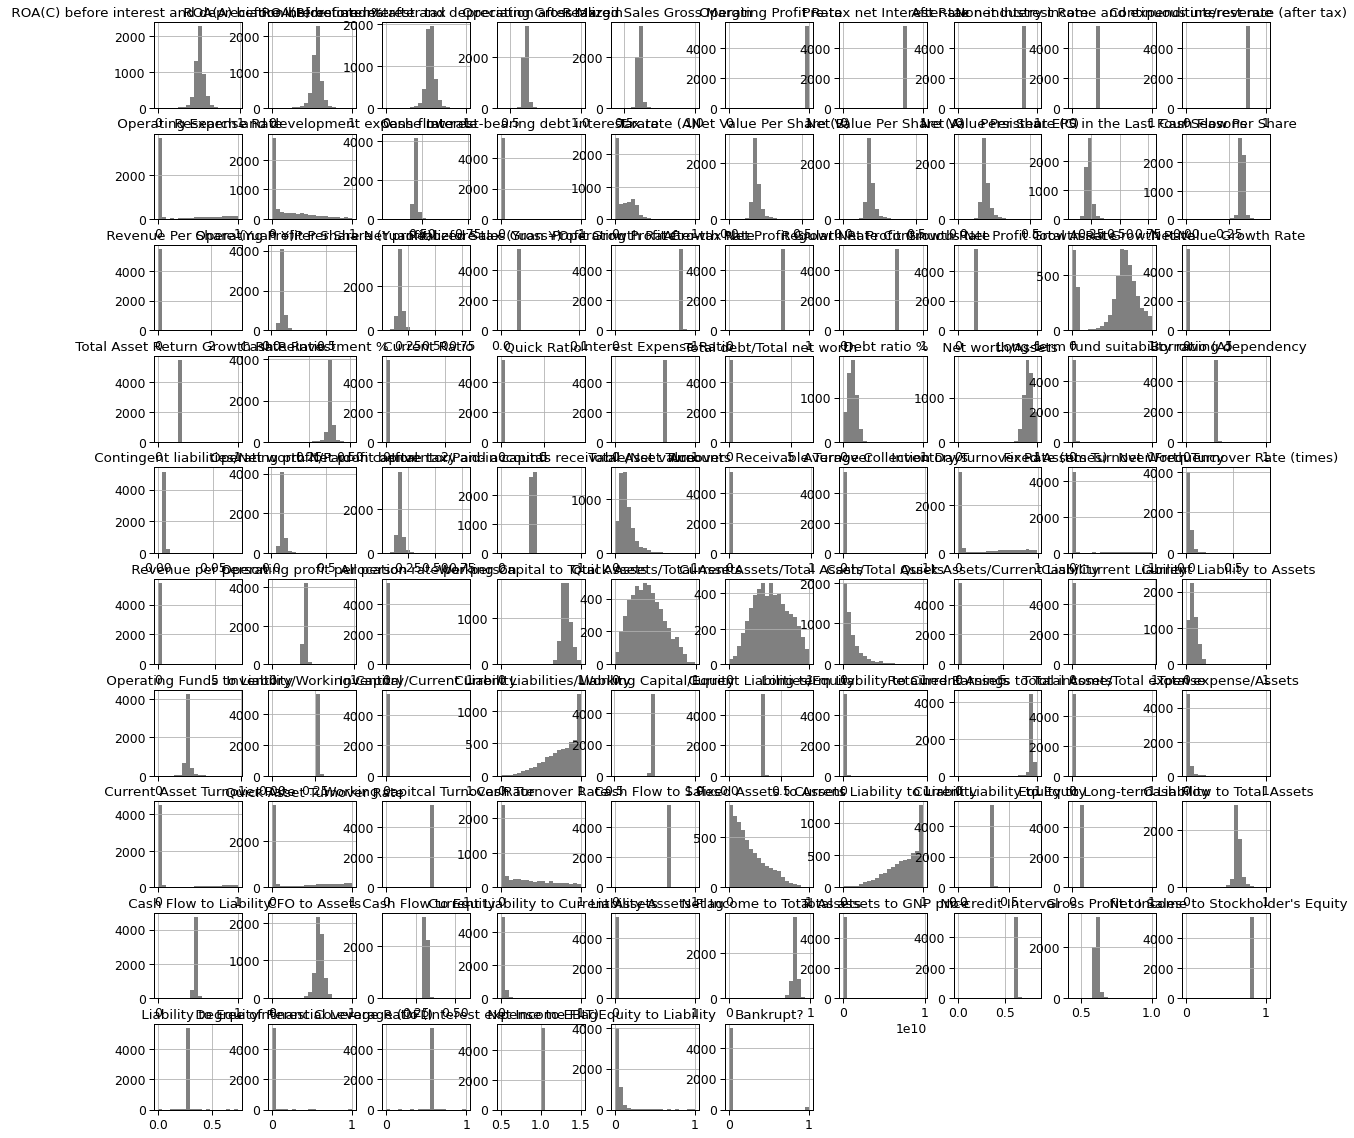

In [110]:
data_train_val.hist(bins = 20, figsize=(20, 20), color="gray")
plt.show()

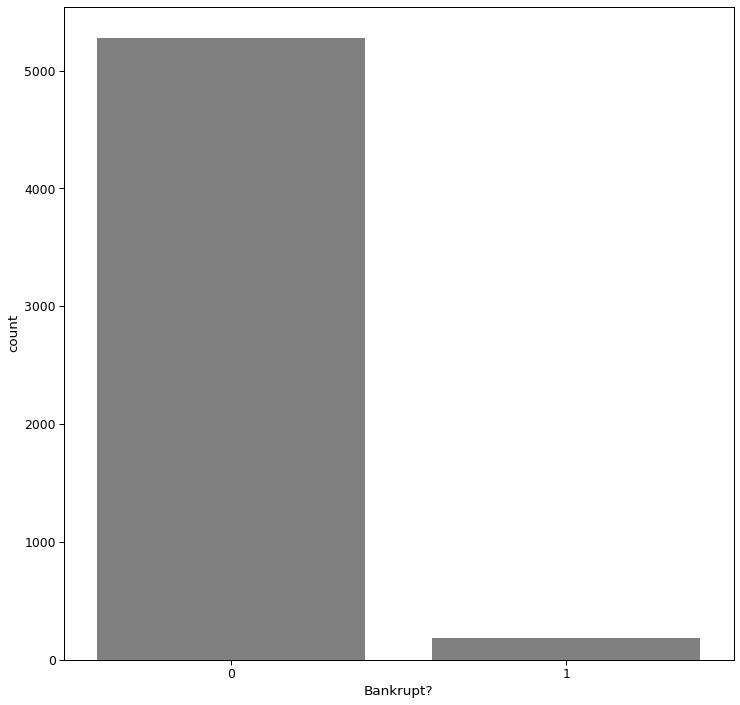

In [111]:
sns.countplot(x="Bankrupt?", data=data_train_val, color='gray')

Widać tutaj, że mamy mocno niezbalansowane klasy

---

## Preprocessing

### Outliery

In [112]:
col_names = data_train_val.columns
indexes_set = set()
num_of_outliers = []

for col in col_names:
    tmp_data1 = data_train_val[col]
    upper_lim1 = tmp_data1.quantile(.975)
    lower_lim1 = tmp_data1.quantile(.025)
    data_train_val[col] = np.where(data_train_val[col] < upper_lim1, data_train_val[col], upper_lim1)
    data_train_val[col] = np.where(data_train_val[col] > lower_lim1, data_train_val[col], lower_lim1)

Dla każdej kolumny outliery zostały zastąpione wartościami granicznymi.

Ze względu na charakter danych trzeba być bardzo ostrożnym z usuwaniem obserwacji, ponieważ naturalne jest, że gdy dana firma bankrutuje, to różne wskaźniki odbiegają mniej bądź bardziej od normy. Aby określić czy coś nie ma pokrycia z rzeczywistością należy posiadać specjalistyczną wiedzę.

Uwaga odnośnie wybierania outlierów. Otwarty przedział wynika z tego, że jeśli w danej kolumnie są przykładowo jedynie wartości równe 1, to przy zamkniętych przedziałach, zosatałyby usunięte wszystkie wartości, dlatego została podjęta taka decyzja.

### Skalowanie

In [113]:
cols_to_scale = []
for col in data_train_val.columns:
    if data[col].max() > 1:
        cols_to_scale.append(col)
print(cols_to_scale)
len(cols_to_scale)

[' Operating Expense Rate', ' Research and development expense rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Current Ratio', ' Quick Ratio', ' Total debt/Total net worth', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency', ' Revenue per person', ' Allocation rate per person', ' Quick Assets/Current Liability', ' Cash/Current Liability', ' Inventory/Current Liability', ' Long-term Liability to Current Assets', ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate', ' Cash Turnover Rate', ' Fixed Assets to Assets', ' Total assets to GNP price']


24

Wychodzi na to, że są łącznie 24 kolumny, które należałoby przeskalować. Sprawdzenie czy nie ma wartości ujemnych zostało dokonane wcześniej.

Wszystkie kolumny, których wartości nie zawierają się jedynie w przedziale [0, 1] zostaną przeskalowane.

In [114]:
for col in cols_to_scale:
    min_max_scaler1 = MinMaxScaler()
    scaled_col1 = min_max_scaler1.fit_transform(data_train_val[col].values.reshape(-1, 1))
    data_train_val[col] = scaled_col1

### Redukcja zmiennych silnie skorelowanych

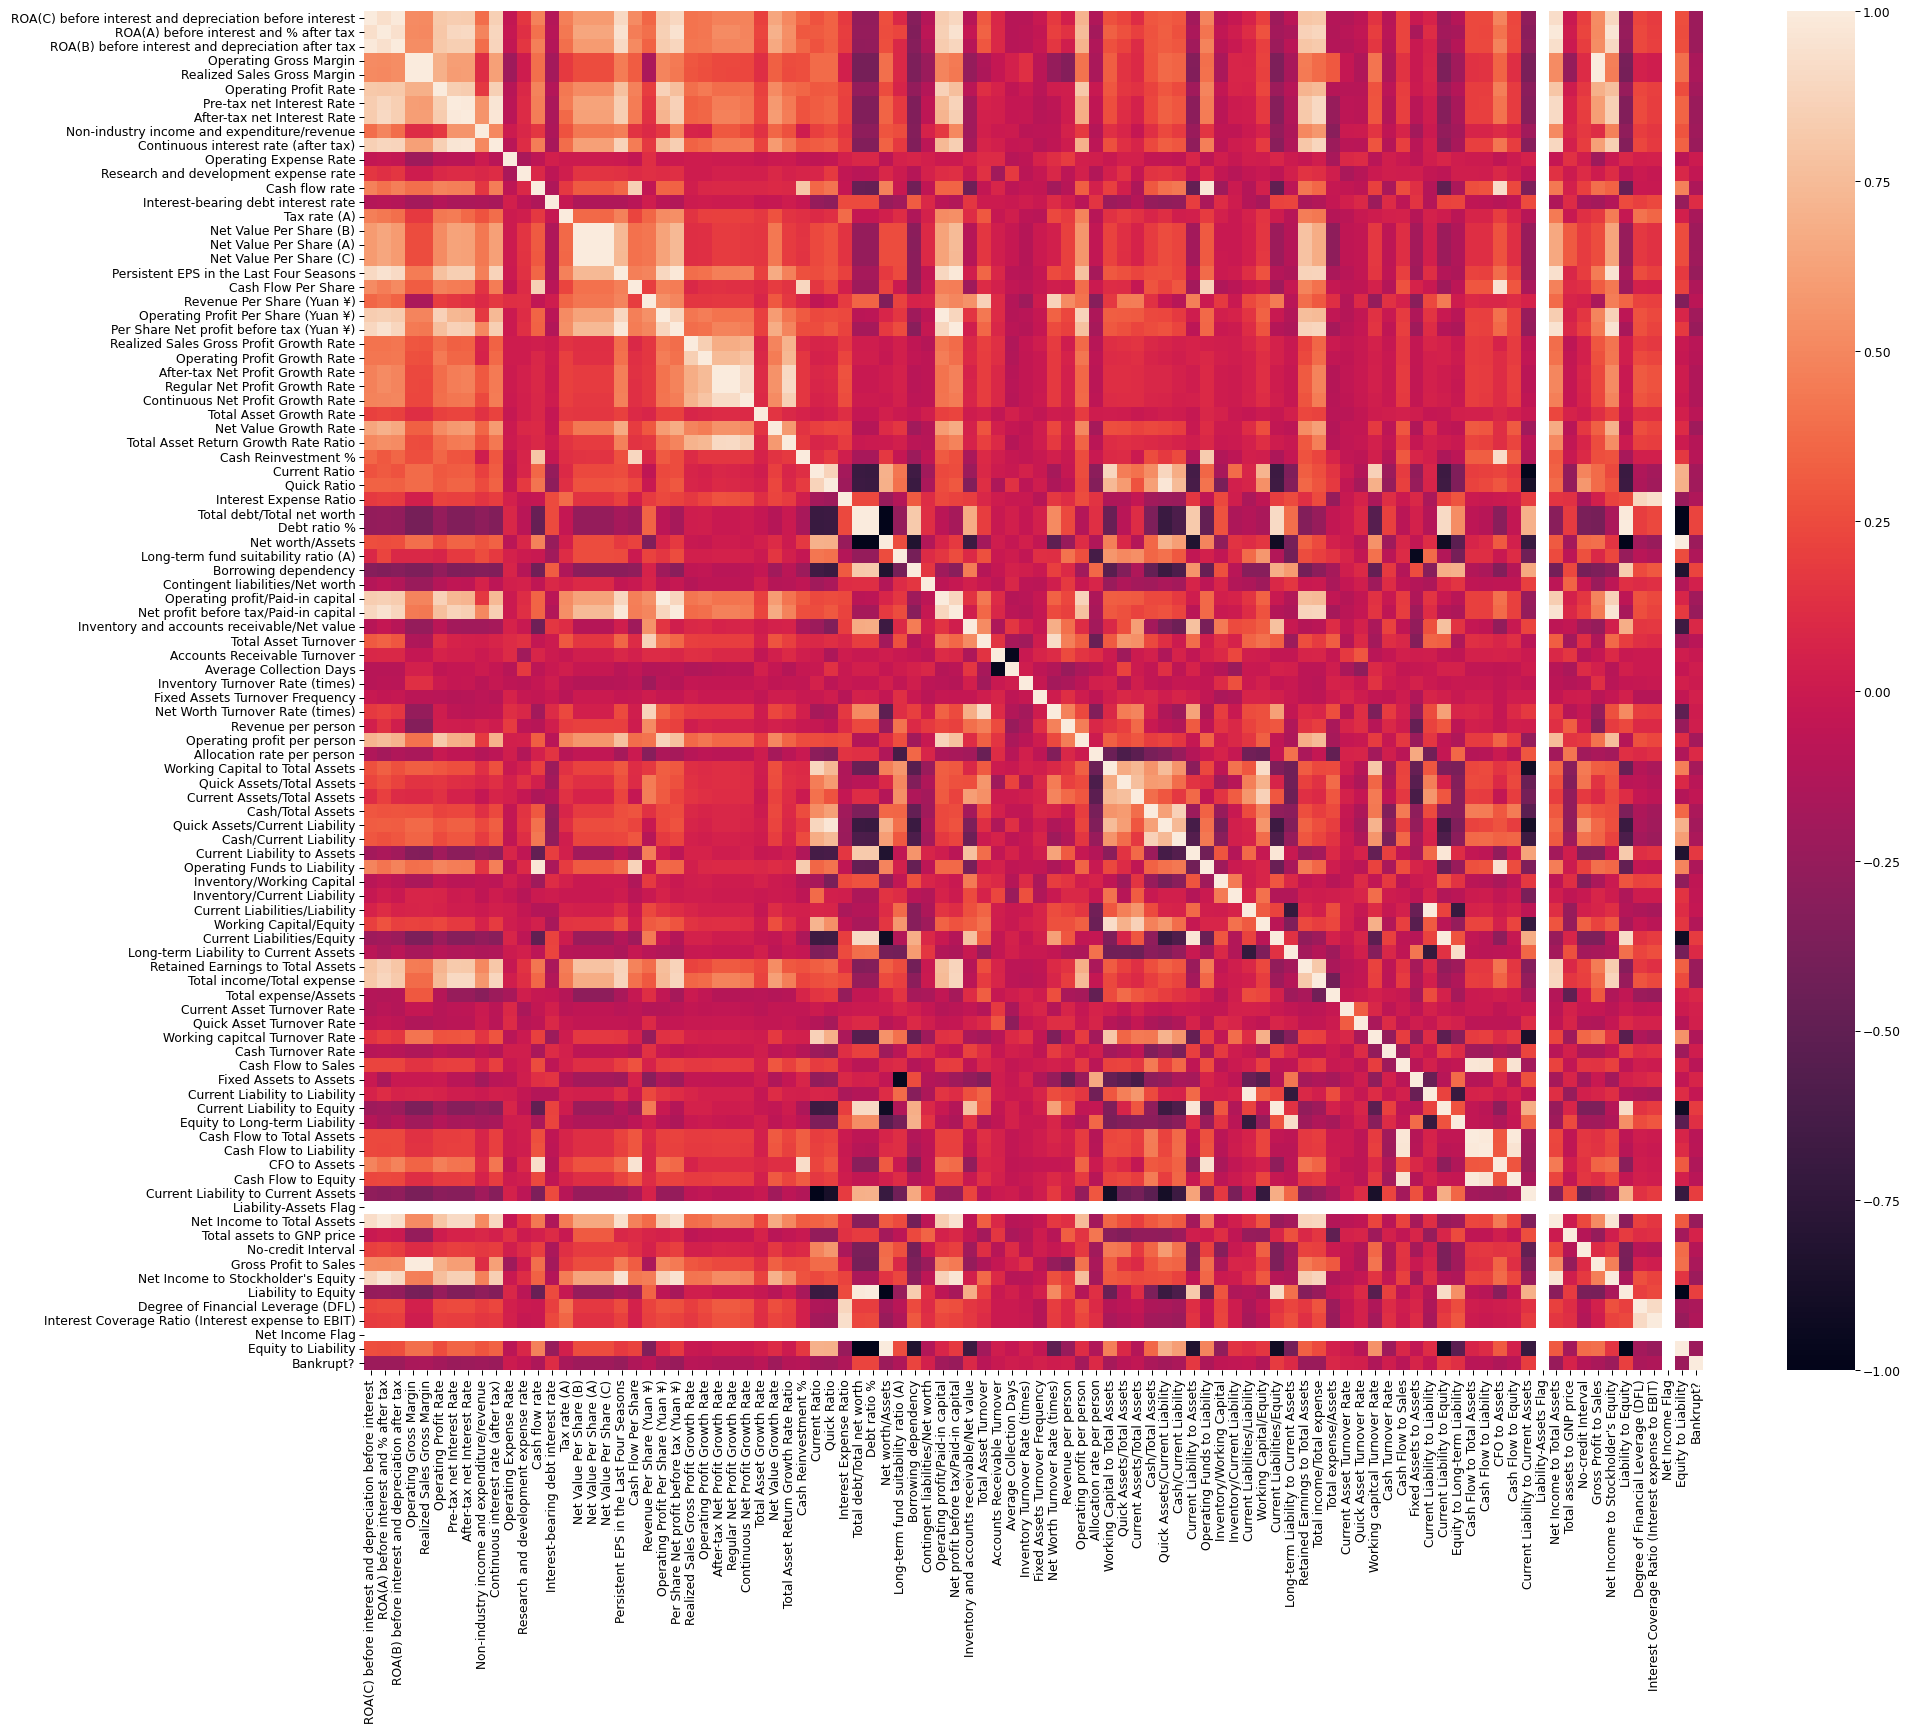

In [115]:
plt.figure(figsize=(30,25))
corr = data_train_val.corr(method = 'spearman')
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, fmt=".2f")

In [116]:
correlated_features = set()

for i in range(len(corr .columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= 0.95:
            colname = corr.columns[i]
            correlated_features.add(colname)

In [117]:
print(correlated_features)
print(len(correlated_features))
len(correlated_features)/data_train_val.shape[1]

{' Net profit before tax/Paid-in capital', ' Current Liability to Current Assets', ' Debt ratio %', ' Average Collection Days', ' Fixed Assets to Assets', ' Net Value Per Share (A)', ' Continuous interest rate (after tax)', ' Liability to Equity', ' Current Liability to Equity', ' CFO to Assets', ' Regular Net Profit Growth Rate', ' Cash Flow to Liability', ' Net Value Per Share (C)', ' Gross Profit to Sales', ' Operating profit/Paid-in capital', ' Current Liability to Liability', " Net Income to Stockholder's Equity", ' Equity to Liability', ' Current Liabilities/Equity', ' Cash Flow to Equity', ' Realized Sales Gross Margin', ' Operating Funds to Liability', ' Quick Assets/Current Liability', ' Per Share Net profit before tax (Yuan ¥)', ' ROA(B) before interest and depreciation after tax', ' Cash Flow to Total Assets', ' After-tax net Interest Rate', ' Net worth/Assets', ' Net Income to Total Assets'}
29


0.3020833333333333

In [118]:
data_train_val.drop(labels=correlated_features, axis=1, inplace=True)

Pozbyliśmy się 29 kolumn, dla których wspołczynnik korelacji z którąś inną kolumną wynosił więcej niż 0.95 .

### Zmiana kierunku zmiennych

In [95]:
corr = data_train_val.corr(method = 'spearman')
(corr["Bankrupt?"] < 0).sum()

45

In [ ]:
columns = data_train_val.drop("Bankrupt?", axis=1).columns

for col in columns:
    if corr["Bankrupt?"][col] < 0:
      data_train_val[col] *= -1

In [98]:
corr = data_train_val.corr(method = 'spearman')
(corr["Bankrupt?"] < 0).sum()

0

Teraz wszystke zmienne są dodatnio skorelowane ze zmienną celu.

## Modelowanie

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from tqdm.notebook import tqdm

In [122]:
def show_model_metrics(model, X, y):
    y_pred = model.predict(X)
    print(f"F1 score: {f1_score(y, y_pred, average=None)}")
    print(f"F1 score micro: {f1_score(y, y_pred, average='micro')}")
    print(f"F1 score weighted: {f1_score(y, y_pred, average='weighted')}")
    print(f"Precision score: {precision_score(y, y_pred, average=None)}")
    print(f"Recall score: {recall_score(y, y_pred, average=None)}")

In [123]:
from sklearn.model_selection import train_test_split

X = data_train_val.drop("Bankrupt?", axis=1)
y = data_train_val["Bankrupt?"]
y = y.astype('int')

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=420, test_size=0.125)

## Klasyfikator `XGBClassifier`

In [124]:
xgb_clf = xgb.XGBClassifier(random_state=1,
                    booster='gbtree', 
                    use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(xgb_clf, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(xgb_clf, X_val, y_val)

--------------------------------------------------
Train set scores
F1 score: [0.9947204  0.81509434]
F1 score micro: 0.9897339199664781
F1 score weighted: 0.9888495260136541
Precision score: [0.9897084  0.99082569]
Recall score: [0.99978341 0.69230769]
--------------------------------------------------
Validation set scores
F1 score: [0.98493976 0.44444444]
F1 score micro: 0.9706744868035191
F1 score weighted: 0.9667119111833453
Precision score: [0.97757848 0.61538462]
Recall score: [0.99241275 0.34782609]


In [125]:
xgb_clf = xgb.XGBClassifier(random_state=1,
                    booster='gbtree', 
                    use_label_encoder=False,
                    max_depth=2,
                    learning_rate=0.3
                    )
xgb_clf.fit(X_train, y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(xgb_clf, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(xgb_clf, X_val, y_val)

--------------------------------------------------
Train set scores
F1 score: [0.99654577 0.88652482]
F1 score micro: 0.993295621202598
F1 score weighted: 0.9929498608447368
Precision score: [0.99332903 0.99206349]
Recall score: [0.99978341 0.80128205]
--------------------------------------------------
Validation set scores
F1 score: [0.98266767 0.37837838]
F1 score micro: 0.966275659824047
F1 score weighted: 0.9622884137554631
Precision score: [0.9760479 0.5      ]
Recall score: [0.98937785 0.30434783]


  0%|          | 0/20 [00:00<?, ?it/s]

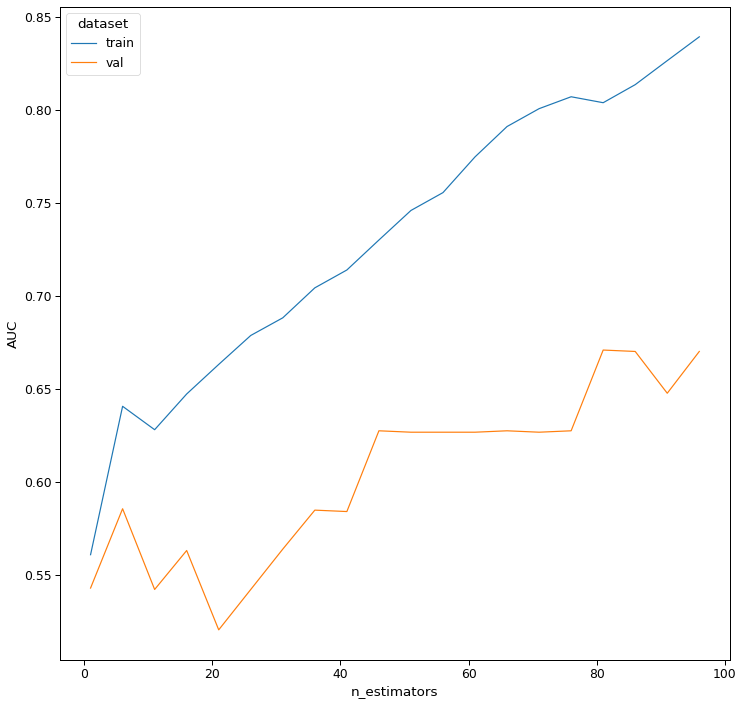

In [126]:
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(1,100,5)
for trees_nr in tqdm(estimators):
    xgb_clf = xgb.XGBClassifier(n_estimators=trees_nr, max_depth=3, eval_metric='logloss').fit(X_train, y_train)
    train_score = roc_auc_score(y_train, xgb_clf.predict(X_train))
    val_score = roc_auc_score(y_val, xgb_clf.predict(X_val))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

  0%|          | 0/19 [00:00<?, ?it/s]

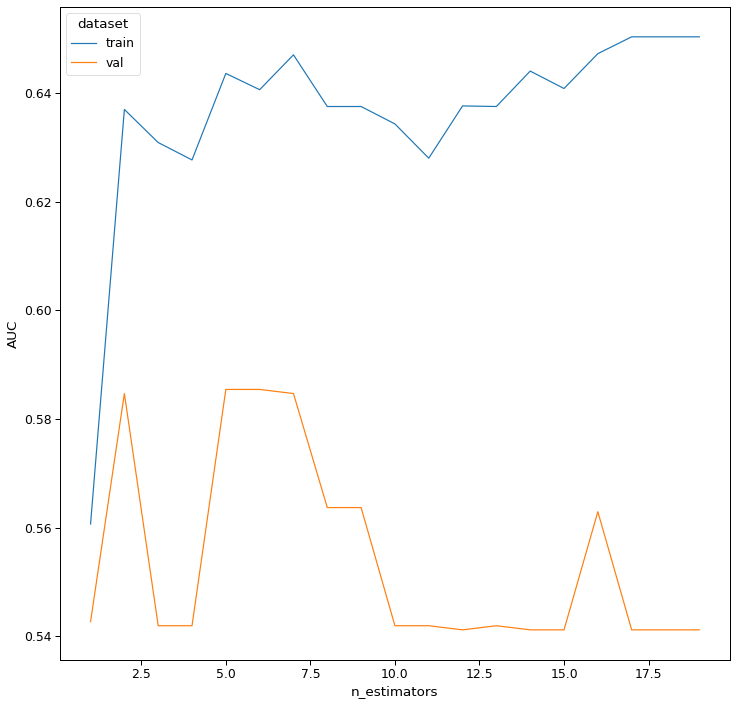

In [127]:
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(1,20,1)
for trees_nr in tqdm(estimators):
    xgb_clf = xgb.XGBClassifier(n_estimators=trees_nr, max_depth=3, eval_metric='logloss').fit(X_train, y_train)
    train_score = roc_auc_score(y_train, xgb_clf.predict(X_train))
    val_score = roc_auc_score(y_val, xgb_clf.predict(X_val))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

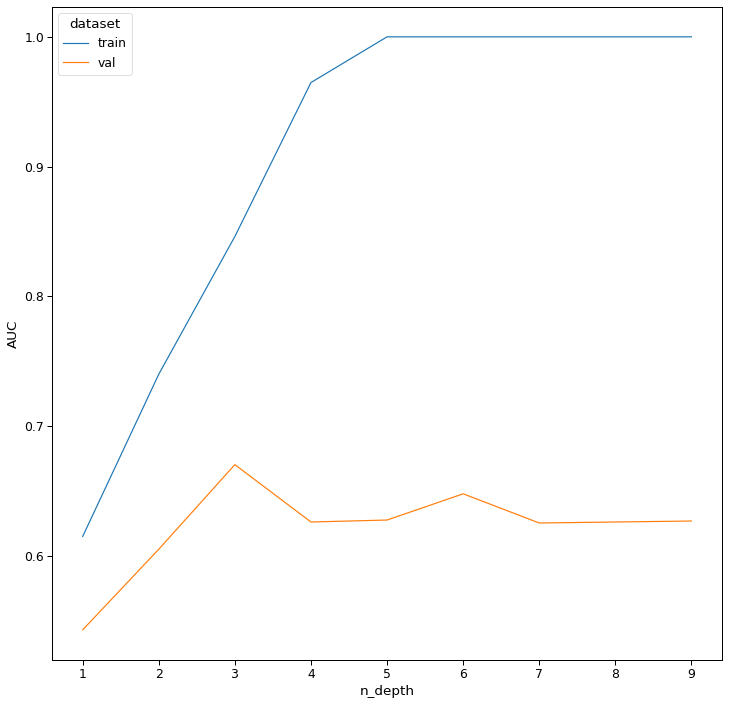

In [128]:
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    xgb_clf = xgb.XGBClassifier(max_depth=depth, eval_metric='logloss').fit(X_train, y_train)
    train_score = roc_auc_score(y_train,xgb_clf.predict(X_train))
    val_score = roc_auc_score(y_val,xgb_clf.predict(X_val))
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

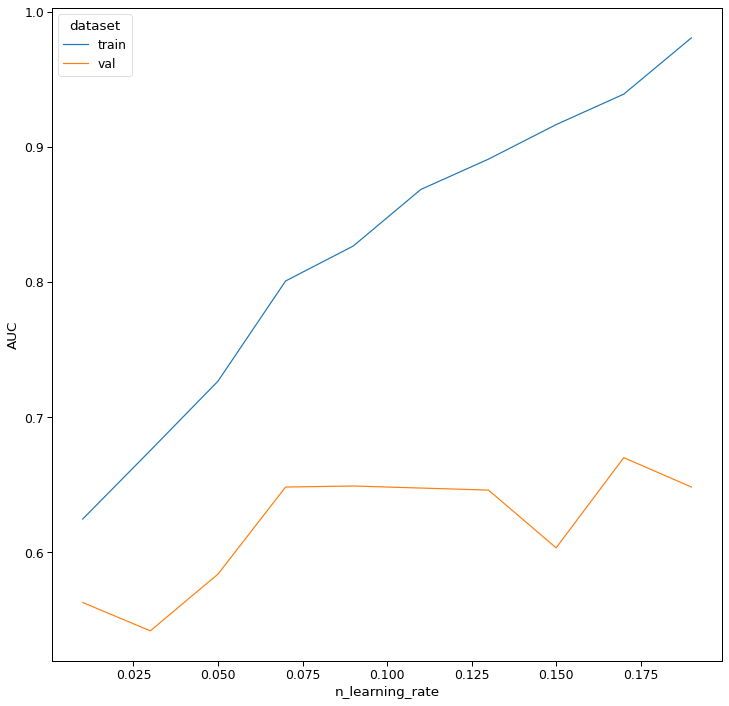

In [129]:
cols = ["n_learning_rate","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_rate = np.arange(0.01,0.2,0.02)
for rate in tqdm(n_rate):
    xgb_clf = xgb.XGBClassifier(learning_rate=rate, eval_metric='logloss').fit(X_train, y_train)
    train_score = roc_auc_score(y_train,xgb_clf.predict(X_train))
    val_score = roc_auc_score(y_val,xgb_clf.predict(X_val))
    history = history.append(dict(zip(cols, [rate, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [rate, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_learning_rate", y = "AUC", hue = "dataset")
plt.show()

Z powyższych wyników widać, że metryką nad której wynikiem należało popracować (jeśli się by dobierało parametry) jest `Recall` dla obserwacji zbankrutowanych przedsiębiorstw.

## Klasyfikator `RandomForestClassifier`

In [130]:
rndForest = RandomForestClassifier()
rndForest.fit(X_train, y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(rndForest, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(rndForest, X_val, y_val)

--------------------------------------------------
Train set scores
F1 score: [1. 1.]
F1 score micro: 1.0
F1 score weighted: 1.0
Precision score: [1. 1.]
Recall score: [1. 1.]
--------------------------------------------------
Validation set scores
F1 score: [0.98353293 0.21428571]
F1 score micro: 0.967741935483871
F1 score weighted: 0.957590579210243
Precision score: [0.9704579 0.6      ]
Recall score: [0.9969651  0.13043478]


Widać tutaj mocne przetrenowanie kosztem predykcyjności dla zbankrutowanych przedsiębiorstw.

Podobnie jak w przypadku XGBoost krytyczną metryką jest `Recall` dla przedsiębiorstw, które zbankrutowały. Naturalnie F1 score dla tej klasy też nie jest najlepszy, ale to wynika z tego, że ta metryka jest zalezna od recall.

  0%|          | 0/60 [00:00<?, ?it/s]

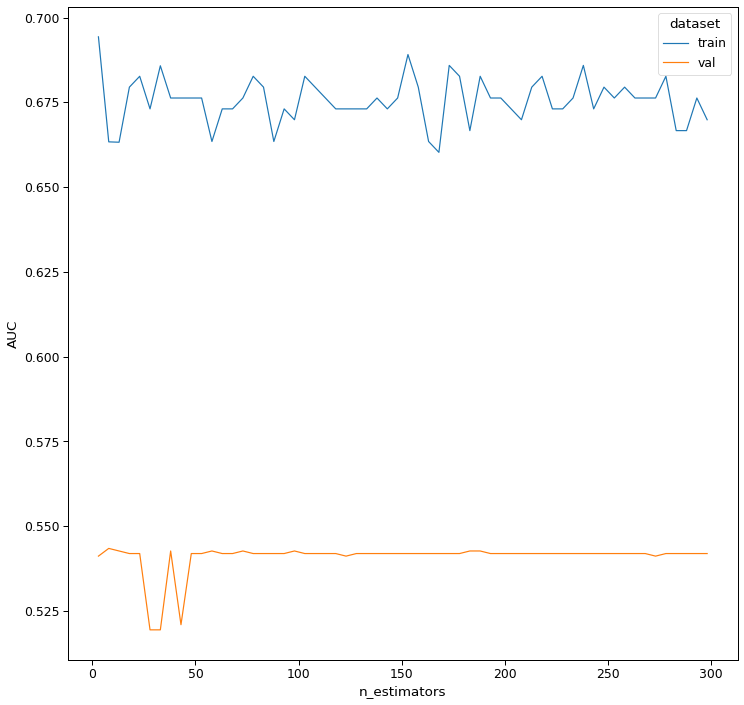

In [131]:
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(3,300,5)
for trees_nr in tqdm(estimators):
    rf = RandomForestClassifier(n_estimators=trees_nr, max_depth=5, n_jobs=-1).fit(X_train, y_train)
    train_score = roc_auc_score(y_train, rf.predict(X_train))
    val_score = roc_auc_score(y_val, rf.predict(X_val))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

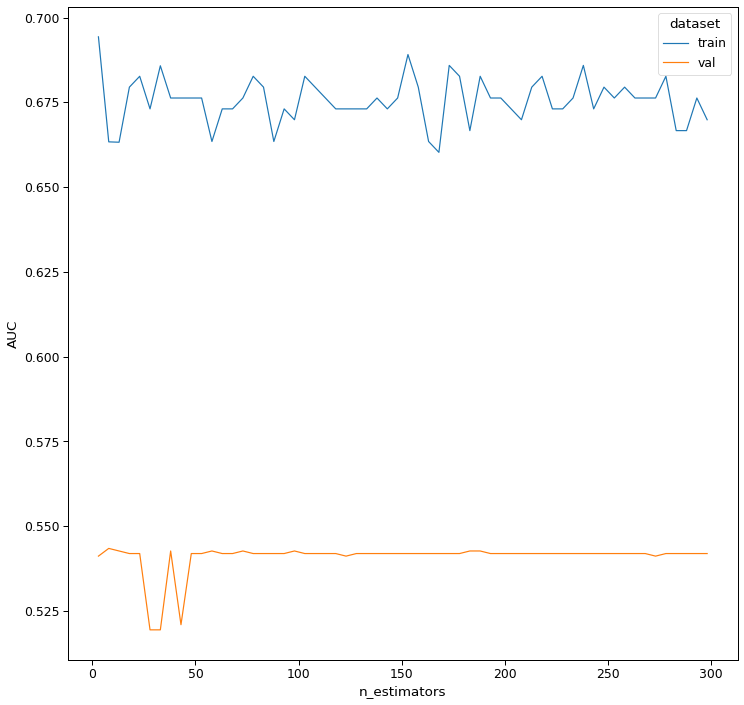

In [132]:
sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

---

In [133]:
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(3,96,3)
for trees_nr in tqdm(estimators):
    rf = RandomForestClassifier(n_estimators=trees_nr, max_depth=5, n_jobs=-1).fit(X_train, y_train)
    train_score = roc_auc_score(y_train, rf.predict(X_train))
    val_score = roc_auc_score(y_val, rf.predict(X_val))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

  0%|          | 0/31 [00:00<?, ?it/s]

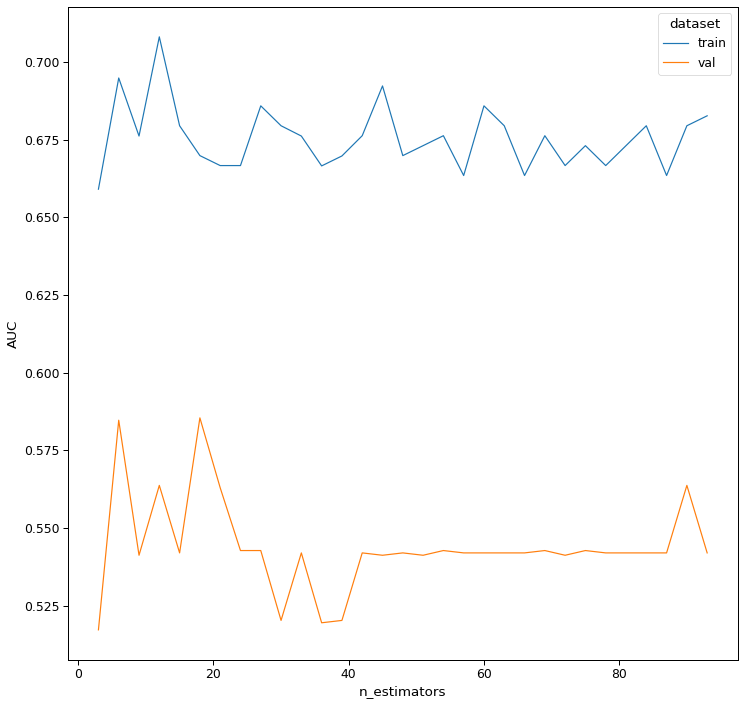

In [134]:
sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

---

In [135]:
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    rf = RandomForestClassifier(max_depth=depth, n_jobs=-1, n_estimators=100).fit(X_train, y_train)
    train_score = roc_auc_score(y_train,rf.predict(X_train))
    val_score = roc_auc_score(y_val,rf.predict(X_val))
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

  0%|          | 0/9 [00:00<?, ?it/s]

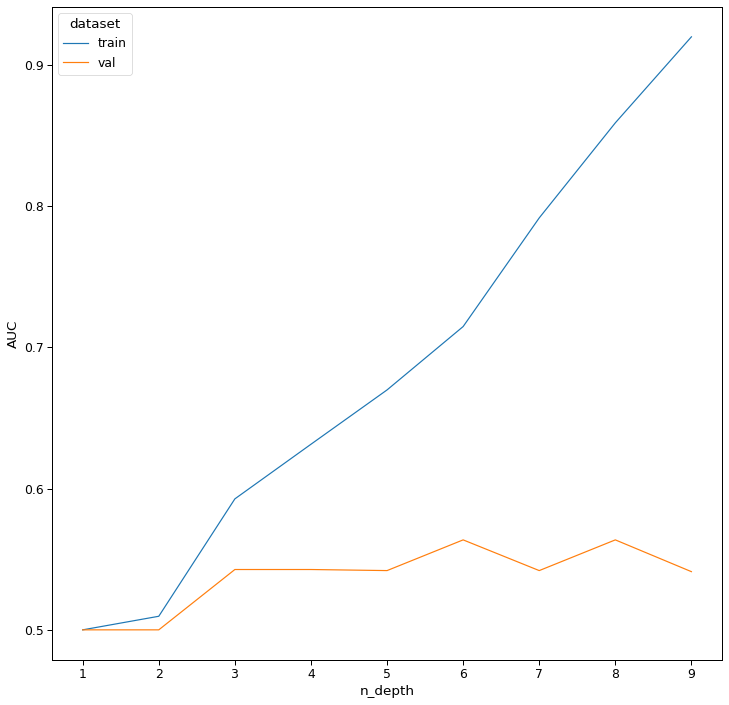

In [136]:
sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

In [137]:
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    rf = RandomForestClassifier(max_depth=depth, n_jobs=-1, n_estimators=100).fit(X_train, y_train)
    train_score = rf.score(X_train,y_train)
    val_score = rf.score(X_val,y_val)
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

  0%|          | 0/9 [00:00<?, ?it/s]

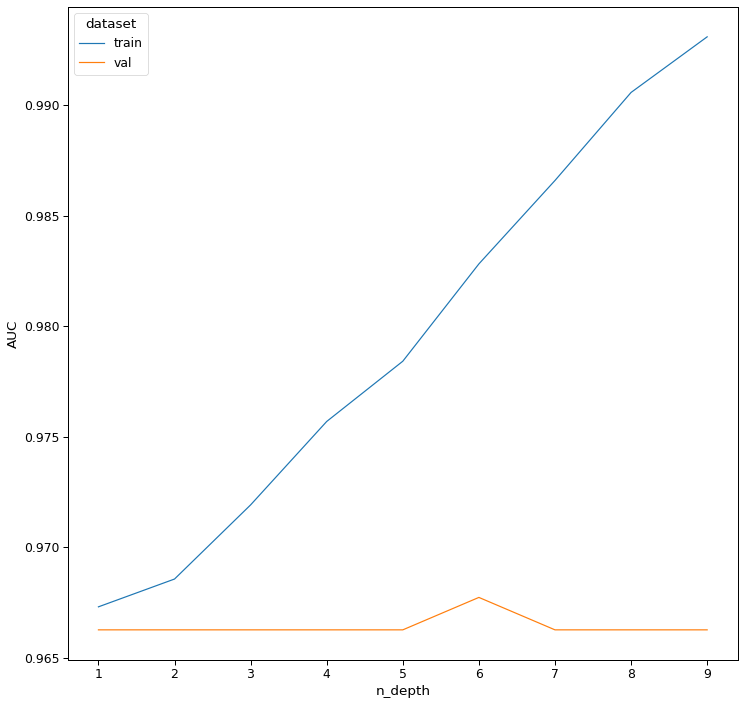

In [138]:
sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

Różnica w skali na ostatnich dwóch wykresach jest ogromna, jedyna różnica między nimi - typ miary oceny.

In [139]:
rndForest = RandomForestClassifier(max_depth = 6, n_estimators=100)
rndForest.fit(X_train, y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(rndForest, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(rndForest, X_val, y_val)

--------------------------------------------------
Train set scores
F1 score: [0.99087885 0.62555066]
F1 score micro: 0.9821914938194009
F1 score weighted: 0.9789385191646901
Precision score: [0.98192259 1.        ]
Recall score: [1.         0.45512821]
--------------------------------------------------
Validation set scores
F1 score: [0.98130142 0.07407407]
F1 score micro: 0.9633431085043989
F1 score weighted: 0.950705777424237
Precision score: [0.96755162 0.25      ]
Recall score: [0.99544765 0.04347826]


Co ciekawe, pomimo zmnijeszenia przetrenowania modelu (trochę) predykcyjność jest niższa.

## Klasyfikator `DecisionTreeClassifier`

In [140]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(d_tree, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(d_tree, X_val, y_val)

--------------------------------------------------
Train set scores
F1 score: [1. 1.]
F1 score micro: 1.0
F1 score weighted: 1.0
Precision score: [1. 1.]
Recall score: [1. 1.]
--------------------------------------------------
Validation set scores
F1 score: [0.97501893 0.23255814]
F1 score micro: 0.9516129032258065
F1 score weighted: 0.9499799249585296
Precision score: [0.97280967 0.25      ]
Recall score: [0.97723824 0.2173913 ]


W przypadku drzewa decyzyjnego, po raz pierwszy wynik precision i recall dla bankrtów jest porównywalny.

---

  0%|          | 0/31 [00:00<?, ?it/s]

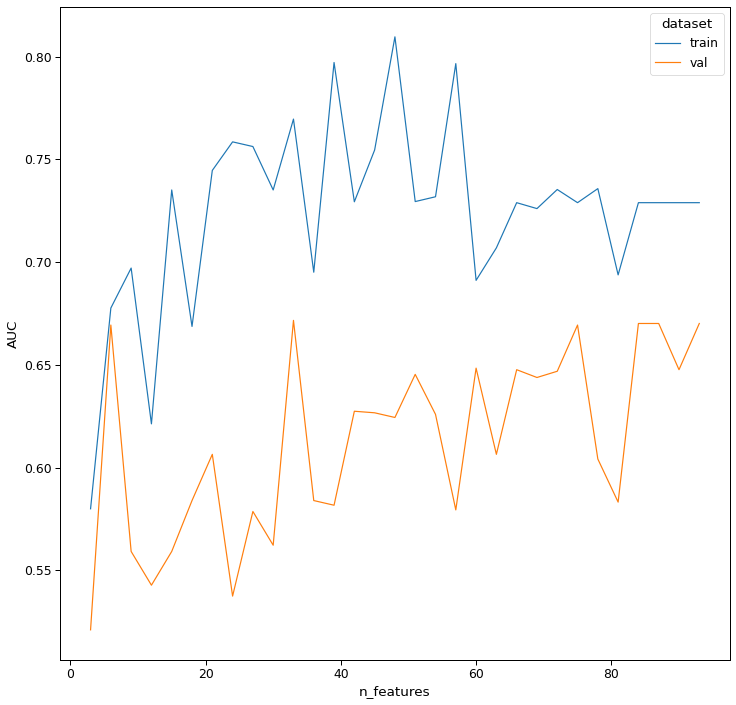

In [141]:
cols = ["n_features","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(3,96,3)
for trees_nr in tqdm(estimators):
    rf = DecisionTreeClassifier(max_features=trees_nr, max_depth=5, random_state=1).fit(X_train, y_train)
    train_score = roc_auc_score(y_train, rf.predict(X_train))
    val_score = roc_auc_score(y_val, rf.predict(X_val))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_features", y = "AUC", hue = "dataset")
plt.show()

---

  0%|          | 0/29 [00:00<?, ?it/s]

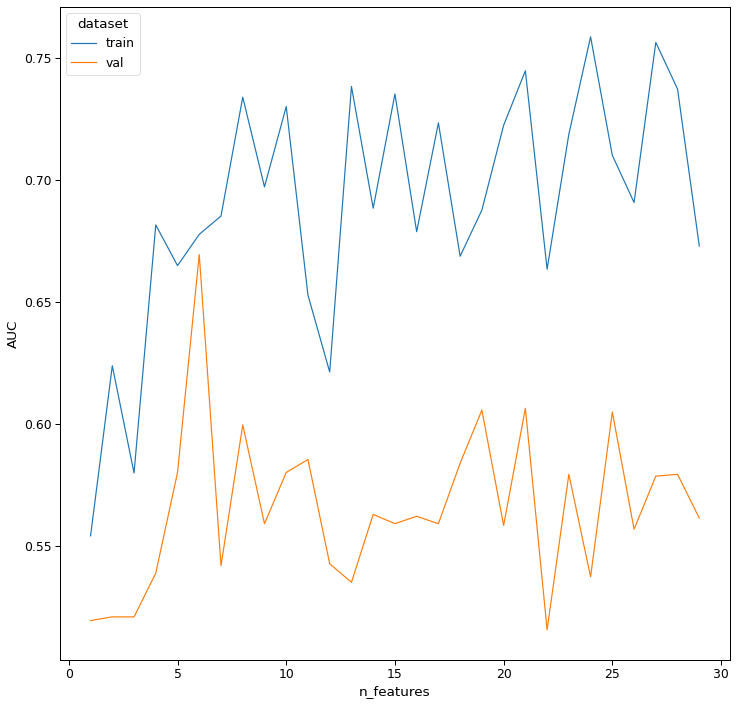

In [142]:
cols = ["n_features","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(1,30,1)
for trees_nr in tqdm(estimators):
    rf = DecisionTreeClassifier(max_features=trees_nr, max_depth=5, random_state=1).fit(X_train, y_train)
    train_score = roc_auc_score(y_train, rf.predict(X_train))
    val_score = roc_auc_score(y_val, rf.predict(X_val))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_features", y = "AUC", hue = "dataset")
plt.show()

---

In [143]:
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    rf = DecisionTreeClassifier(max_depth=depth, random_state=1).fit(X_train, y_train)
    train_score = roc_auc_score(y_train,rf.predict(X_train))
    val_score = roc_auc_score(y_val,rf.predict(X_val))
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

  0%|          | 0/9 [00:00<?, ?it/s]

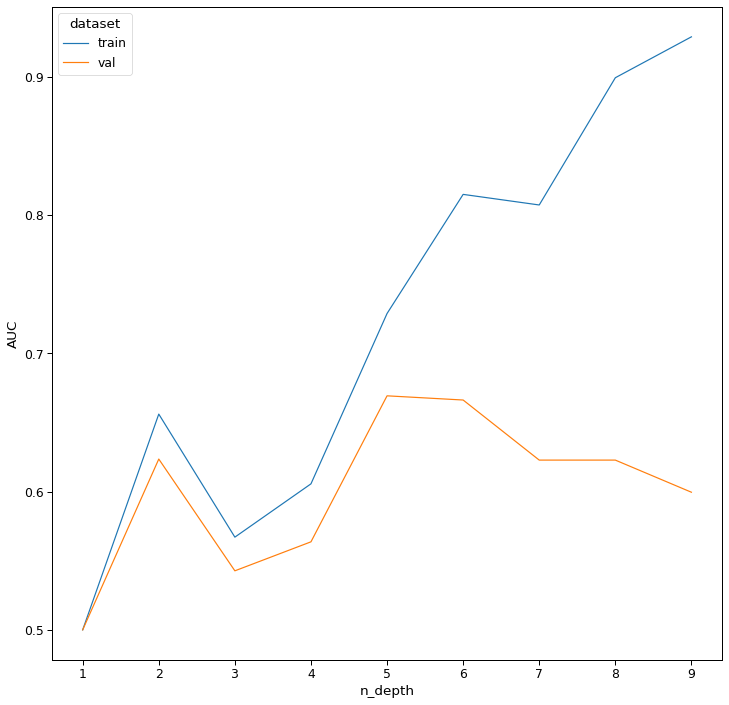

In [144]:
sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

Tutaj widzimy wyraźny overfitting klasyfikatora `DecisionTreeClassifier`.

In [145]:
d_tree = DecisionTreeClassifier(max_depth=6, max_features=30, random_state=1)
d_tree.fit(X_train,y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(d_tree, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(d_tree, X_val, y_val)

--------------------------------------------------
Train set scores
F1 score: [0.99053356 0.648     ]
F1 score micro: 0.9815629583071444
F1 score weighted: 0.9793382483872817
Precision score: [0.98397093 0.86170213]
Recall score: [0.99718432 0.51923077]
--------------------------------------------------
Validation set scores
F1 score: [0.97965335 0.27027027]
F1 score micro: 0.9604105571847508
F1 score weighted: 0.9557298770172824
Precision score: [0.97305389 0.35714286]
Recall score: [0.98634294 0.2173913 ]


In [146]:
d_tree = DecisionTreeClassifier(max_depth=8, max_features=30, random_state=1)
d_tree.fit(X_train,y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(d_tree, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(d_tree, X_val, y_val)

--------------------------------------------------
Train set scores
F1 score: [0.99536188 0.84363636]
F1 score micro: 0.990990990990991
F1 score weighted: 0.9904029075898345
Precision score: [0.99140524 0.97478992]
Recall score: [0.99935023 0.74358974]
--------------------------------------------------
Validation set scores
F1 score: [0.98338369 0.45      ]
F1 score micro: 0.967741935483871
F1 score weighted: 0.9653956729363611
Precision score: [0.97894737 0.52941176]
Recall score: [0.98786039 0.39130435]


Przy pewnych parametrach udało się uzyskać lepszą predykcyjność niż dla domyślnych parametrów. Nadal Recall jest najważniejszą metryką co do poprawy predykcyjności, lecz różnica względem precision dla drzew decyzyjnych jest mniejsza.

## Wnioski

W powyższym porównaniu klasyfikatorów, gdy parametry modelu przyjmowały wartości domyślne, najlepszy był się `XGBClassifier`.
W sytuacjach, w których w ręczny sposób dobrane zostały parametry, najskuteczniejszy okazał się `DecisionTreeClassifier`.